In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx



import sklearn.model_selection as sklm


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl





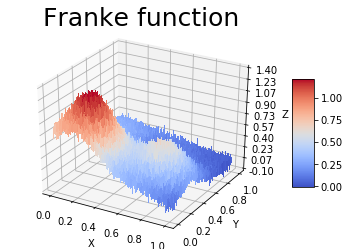

In [22]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)


x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.05
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x_mesh, y_mesh, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Franke function', fontsize=25, y=1.05)# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


## oppgave 1 
standard ols.
confidence intervals for beta by computing their variances.
evaluate MSE and R2.

In [3]:
maxpower = 10

# preallocating variables
beta_ols       = {}
pred_ols       = {}
confidence_ols = {}
mse_ols        = np.empty([maxpower])
r2_ols         = np.empty([maxpower])
mse_ols_scikit = np.empty([maxpower])
r2_ols_scikit  = np.empty([maxpower])

# Running loop over model complexity (polynomial degree) 
for i in range(maxpower):
    
    # Creating design matrix, extracting beta and predicting 
    design      = fx.DesignDesign(x,y,i+1)  
    beta_ols ['poly{0}'.format(i+1)], pred_ols ['poly{0}'.format(i+1)]\
                = fx.OridinaryLeastSquares(design,np.ravel(frank),design) 
    
    mse_ols[i]        = fx.MSE(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols[i]         = fx.R2Score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),pred_ols['poly'+str(i+1)])
    r2_ols_scikit[i]  = r2_score(np.ravel(frank),pred_ols['poly'+str(i+1)])
    
    confidence_ols ['conf{0}'.format(i+1)]= fx.confidence_interval(design,noise_level,0.95)
    print((i+1)*100/maxpower, '% completed')
    

10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed


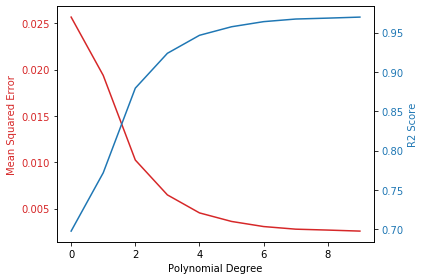

In [4]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

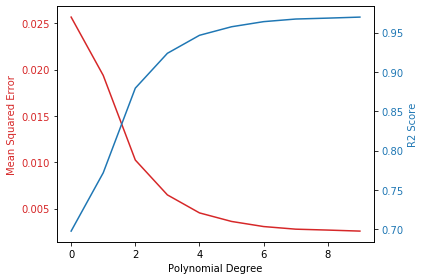

In [5]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols_scikit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols_scikit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

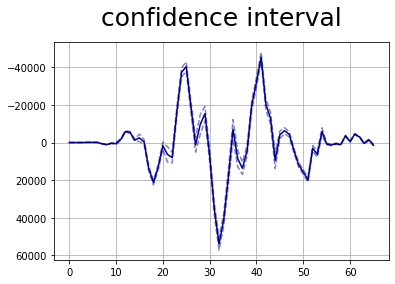

In [6]:

power =10

plt.plot(beta_ols['poly'+str(power)] - confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)] + confidence_ols['conf'+str(power)], linestyle='--', c='darkblue', alpha=0.5)
plt.plot(beta_ols['poly'+str(power)], c='darkblue')
plt.gca().invert_yaxis()
plt.title('confidence interval', fontsize=25, y=1.05)
plt.grid()
plt.show()


# oppgave B

In [7]:


design      = fx.DesignDesign(x,y,5)  
design_train, design_test, y_train, y_test = train_test_split(design, np.ravel(frank), test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(design_train.T.dot(design_train)).dot(design_train.T).dot(y_train)


# and then make the prediction

prediction = design_test @ beta



print("Test R2")
print(fx.R2Score(y_test,prediction))
print("Test R2- Scikit Learn")
print(r2_score(y_test,prediction)) 

# Tester med Scikit Learn



print("Test MSE")
print(fx.MSE(y_test,prediction))          
print("Test MSE- Scikit Learn")
print(mean_squared_error(y_test,prediction))

Test R2
0.9464700166384927
Test R2- Scikit Learn
0.9464700166384927
Test MSE
0.004636364043692468
Test MSE- Scikit Learn
0.004636364043692468


In [23]:
maxpower = 10
r2_out   = np.zeros(maxpower)
r2_in    = np.zeros(maxpower)
mse_out  = np.zeros(maxpower)
mse_in   = np.zeros(maxpower)
bias     = np.zeros(maxpower)
variance = np.zeros(maxpower)

r2_out_sci   = np.zeros(maxpower)
r2_in_sci    = np.zeros(maxpower)
mse_out_sci  = np.zeros(maxpower)
mse_in_sci   = np.zeros(maxpower)
bias_sci     = np.zeros(maxpower)
variance_sci = np.zeros(maxpower)

for i in range(maxpower):
    
    design_matrix   = fx.DesignDesign(x,y,i+1)
    r2_out[i], mse_out[i], r2_in[i], mse_in[i], bias[i], variance[i] \
                    = fx.k_fold_cv(7, frank, design_matrix, fx.RidgeRegression,10e-05, shuffle=False)
    r2_out_sci[i], mse_out_sci[i], r2_in_sci[i], mse_in_sci[i], bias_sci[i], variance_sci[i] \
                    = fx.k_fold_cv(7, frank, design_matrix, fx.RidgeRegression,10e-05, shuffle=False, scikit=True)
    
    print((i+1)*100/maxpower, '% completed')


10.0 % completed
20.0 % completed
30.0 % completed
40.0 % completed
50.0 % completed
60.0 % completed
70.0 % completed
80.0 % completed
90.0 % completed
100.0 % completed


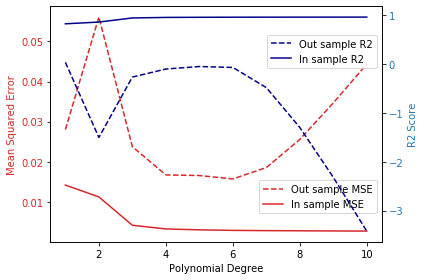

In [24]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.00, 0.02) 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.64, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



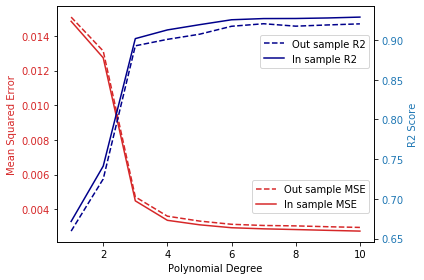

In [18]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(1,maxpower+1), mse_out_sci, color=color,linestyle='--', label='Out sample MSE')
ax1.plot(range(1,maxpower+1), mse_in_sci, color=color, label='In sample MSE')
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0.00, 0.02)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,maxpower+1), r2_out_sci, c='darkblue',linestyle='--', label='Out sample R2')
ax2.plot(range(1,maxpower+1), r2_in_sci,  c='darkblue', label='In sample R2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', bbox_to_anchor=(1, 0.9))
#ax2.set_ylim(0.6, 1)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
